In [2]:
from LRGradientDescent import LogisticRegressionGradientDescent as LRGD
from LRGradientDescentWithFeatureTransform import LRGDWithFeatureTransform as LRGDF
from show_images import show_images
import numpy as np
from scipy.special import logsumexp
from scipy.special import expit as sigm #sigmoid function
from numpy import genfromtxt
from matplotlib import pyplot as plt

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import sklearn.linear_model
import sklearn.tree
import sklearn.metrics

from scipy.special import expit as sigm
from numpy.random import randint

In [3]:
x= genfromtxt('data_sneaker_vs_sandal/x_train.csv', delimiter=',')[1:]
#xbias_NG = lr.insert_final_col_of_all_ones(x_all)
y= genfromtxt('data_sneaker_vs_sandal/y_train.csv', delimiter=',')[1:]

In [4]:
print(x.shape, y.shape)

(12000, 784) (12000,)


In [25]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):
    ''' Compute counts of four possible outcomes of a binary classifier for evaluation.
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yhat_N : 1D array of floats
        Each entry represents a predicted binary value (either 0 or 1).
        One entry per example in current dataset.
        Needs to be same size as ytrue_N.

    Returns
    -------
    TP : float
        Number of true positives
    TN : float
        Number of true negatives
    FP : float
        Number of false positives
    FN : float
        Number of false negatives
    '''
    TP = 0.0
    TN = 0.0
    FP = 0.0
    FN = 0.0
    FP_id=[]
    FN_id=[]
    l=ytrue_N.size
    for i in range(0,l):
        if (yhat_N[i]==1):
            if (ytrue_N[i]==1):
                TP=TP+1.0
            else:
                FP=FP+1.0
                FP_id.append(i)
        else:
            if (ytrue_N[i]==0):
                TN=TN+1.0
            else:
                FN=FN+1.0
                FN_id.append(i)      
    return TP, TN, FP, FN , FP_id, FN_id

In [6]:
def make_noise(x,y):
    N=int(x[0,:].size)
    #print(N)
    x_all=x;
    y_all=y;
    x_on=0;
    for j in range(9):
        x_j=x
        for i in range(y.size):
            for k in range(randint(0,10)):
                pos=randint(0,N)
                x_j[i, pos]=1-x[i,pos]
        x_all=np.concatenate((x_all, x_j), axis=0)
        y_all=np.concatenate((y_all, y), axis=0)
        #print(x_all.shape)
    return x_all, y_all

In [7]:
x_n, y_n=make_noise(x,y)

In [8]:
print(x_n.shape, np.matrix(y_n).shape)
#all_D=np.column_stack((x_n, np.matrix(y_n)))

(120000, 784) (1, 120000)


In [9]:
# Reshuffle:
Data=np.concatenate((x_n, np.matrix(y_n).T), axis=1)
np.random.shuffle(Data)
x_n=Data[:,:-1]
y_n=np.asarray(Data[:,-1]).reshape(-1)

In [10]:
va_rate=0.3
x_va=x_n[:int(np.ceil(va_rate*y_n.shape[0])),]
y_va=y_n[:int(np.ceil(va_rate*y_n.shape[0]))]
x_te=x_n[int(np.ceil(va_rate*y_n.shape[0])):,]
y_te=y_n[int(np.ceil(va_rate*y_n.shape[0])):]

In [11]:
#Check
print (x_te.shape, y_te.shape)
print(y_n.shape)

(84000, 784) (84000,)
(120000,)


In [12]:
## Run LR on original features!
#orig_lr2 = LRGD(alpha=10.0, step_size=0.1)
#orig_lr2.fit(x_te, y_te)

In [13]:
#y_hat_Origin=np.asarray(orig_lr2.predict_proba(x_va)[:,1]).reshape(-1)
#tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va, y_hat_Origin>=0.5)
#acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
#print("Origin Accuracy", acc)

In [14]:
## Run LR on transformed features!
#new_lr2 = LRGDF(alpha=10.0, step_size=0.1)
#new_lr2.fit(x_te, y_te)

In [15]:
va_rate=0.3
x_va0=x[:int(np.ceil(va_rate*y.shape[0])),]
y_va0=y[:int(np.ceil(va_rate*y.shape[0]))]
x_te0=x[int(np.ceil(va_rate*y.shape[0])):,]
y_te0=y[int(np.ceil(va_rate*y.shape[0])):]
orig_lr1 = LRGDF(alpha=10.0, step_size=0.1)
orig_lr1.fit(x_te0, y_te0)

orig_lr0 = LRGD(alpha=10.0, step_size=0.1)
orig_lr0.fit(x_te0, y_te0)

With MinMax
TurnOn Loaded
TurnOnOnce Loaded
TurnOn All Loaded
TurnOn Rate Loaded
TurnOnOnce Rate Loaded
Ave Loaded
Initializing w_G with 1575 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.028836  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.943019  avg_L1_norm_grad         0.056446  w[0]   -0.000 bias    0.000
iter    2/1000000  loss         1.264147  avg_L1_norm_grad         0.094548  w[0]    0.001 bias    0.034
iter    3/1000000  loss         2.039439  avg_L1_norm_grad         0.112421  w[0]   -0.000 bias   -0.008
iter    4/1000000  loss         1.065893  avg_L1_norm_grad         0.084125  w[0]    0.002 bias    0.056
iter    5/1000000  loss         1.508234  avg_L1_norm_grad         0.094314  w[0]    0.001 bias    0.019
iter    6/1000000  loss         0.920049  avg_L1_norm_grad         0.071819  w[0]    0.003 bias    0.073
iter    7/1000000  loss    

iter 2900/1000000  loss         0.178906  avg_L1_norm_grad         0.000085  w[0]   -0.077 bias    0.572
iter 2901/1000000  loss         0.178904  avg_L1_norm_grad         0.000085  w[0]   -0.077 bias    0.572
iter 3000/1000000  loss         0.178694  avg_L1_norm_grad         0.000081  w[0]   -0.078 bias    0.572
iter 3001/1000000  loss         0.178692  avg_L1_norm_grad         0.000081  w[0]   -0.078 bias    0.572
iter 3100/1000000  loss         0.178500  avg_L1_norm_grad         0.000077  w[0]   -0.078 bias    0.572
iter 3101/1000000  loss         0.178498  avg_L1_norm_grad         0.000077  w[0]   -0.078 bias    0.572
iter 3200/1000000  loss         0.178323  avg_L1_norm_grad         0.000073  w[0]   -0.079 bias    0.572
iter 3201/1000000  loss         0.178321  avg_L1_norm_grad         0.000073  w[0]   -0.079 bias    0.572
iter 3300/1000000  loss         0.178160  avg_L1_norm_grad         0.000070  w[0]   -0.079 bias    0.572
iter 3301/1000000  loss         0.178159  avg_L1_norm_g

iter 6801/1000000  loss         0.176312  avg_L1_norm_grad         0.000017  w[0]   -0.086 bias    0.555
iter 6900/1000000  loss         0.176301  avg_L1_norm_grad         0.000016  w[0]   -0.087 bias    0.554
iter 6901/1000000  loss         0.176301  avg_L1_norm_grad         0.000016  w[0]   -0.087 bias    0.554
iter 7000/1000000  loss         0.176290  avg_L1_norm_grad         0.000016  w[0]   -0.087 bias    0.554
iter 7001/1000000  loss         0.176290  avg_L1_norm_grad         0.000016  w[0]   -0.087 bias    0.554
iter 7100/1000000  loss         0.176279  avg_L1_norm_grad         0.000015  w[0]   -0.087 bias    0.553
iter 7101/1000000  loss         0.176279  avg_L1_norm_grad         0.000015  w[0]   -0.087 bias    0.553
iter 7200/1000000  loss         0.176269  avg_L1_norm_grad         0.000015  w[0]   -0.087 bias    0.553
iter 7201/1000000  loss         0.176269  avg_L1_norm_grad         0.000015  w[0]   -0.087 bias    0.553
iter 7300/1000000  loss         0.176260  avg_L1_norm_g

iter 10701/1000000  loss         0.176126  avg_L1_norm_grad         0.000004  w[0]   -0.088 bias    0.543
iter 10800/1000000  loss         0.176125  avg_L1_norm_grad         0.000004  w[0]   -0.088 bias    0.543
iter 10801/1000000  loss         0.176125  avg_L1_norm_grad         0.000004  w[0]   -0.088 bias    0.543
iter 10900/1000000  loss         0.176123  avg_L1_norm_grad         0.000004  w[0]   -0.088 bias    0.542
iter 10901/1000000  loss         0.176123  avg_L1_norm_grad         0.000004  w[0]   -0.088 bias    0.542
iter 11000/1000000  loss         0.176122  avg_L1_norm_grad         0.000004  w[0]   -0.088 bias    0.542
iter 11001/1000000  loss         0.176122  avg_L1_norm_grad         0.000004  w[0]   -0.088 bias    0.542
iter 11100/1000000  loss         0.176121  avg_L1_norm_grad         0.000004  w[0]   -0.088 bias    0.542
iter 11101/1000000  loss         0.176121  avg_L1_norm_grad         0.000004  w[0]   -0.088 bias    0.542
iter 11200/1000000  loss         0.176120  avg

Initializing w_G with 785 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.028764  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.917699  avg_L1_norm_grad         0.029631  w[0]   -0.000 bias    0.000
iter    2/1000000  loss         0.856183  avg_L1_norm_grad         0.020332  w[0]    0.001 bias    0.020
iter    3/1000000  loss         0.811599  avg_L1_norm_grad         0.020819  w[0]    0.001 bias    0.022
iter    4/1000000  loss         0.776603  avg_L1_norm_grad         0.014885  w[0]    0.002 bias    0.038
iter    5/1000000  loss         0.749295  avg_L1_norm_grad         0.015086  w[0]    0.002 bias    0.043
iter    6/1000000  loss         0.726856  avg_L1_norm_grad         0.012120  w[0]    0.002 bias    0.055
iter    7/1000000  loss         0.707978  avg_L1_norm_grad         0.012026  w[0]    0.002 bias    0.062
iter    8/1000000  loss         0.6915

iter 2901/1000000  loss         0.220472  avg_L1_norm_grad         0.000135  w[0]   -0.074 bias    1.751
iter 3000/1000000  loss         0.220235  avg_L1_norm_grad         0.000129  w[0]   -0.076 bias    1.763
iter 3001/1000000  loss         0.220233  avg_L1_norm_grad         0.000129  w[0]   -0.076 bias    1.763
iter 3100/1000000  loss         0.220017  avg_L1_norm_grad         0.000123  w[0]   -0.077 bias    1.774
iter 3101/1000000  loss         0.220015  avg_L1_norm_grad         0.000123  w[0]   -0.077 bias    1.774
iter 3200/1000000  loss         0.219818  avg_L1_norm_grad         0.000118  w[0]   -0.078 bias    1.785
iter 3201/1000000  loss         0.219816  avg_L1_norm_grad         0.000118  w[0]   -0.078 bias    1.785
iter 3300/1000000  loss         0.219636  avg_L1_norm_grad         0.000113  w[0]   -0.079 bias    1.795
iter 3301/1000000  loss         0.219634  avg_L1_norm_grad         0.000113  w[0]   -0.079 bias    1.795
iter 3400/1000000  loss         0.219469  avg_L1_norm_g

iter 6900/1000000  loss         0.217613  avg_L1_norm_grad         0.000028  w[0]   -0.094 bias    1.988
iter 6901/1000000  loss         0.217612  avg_L1_norm_grad         0.000028  w[0]   -0.094 bias    1.988
iter 7000/1000000  loss         0.217602  avg_L1_norm_grad         0.000027  w[0]   -0.094 bias    1.990
iter 7001/1000000  loss         0.217602  avg_L1_norm_grad         0.000027  w[0]   -0.094 bias    1.990
iter 7100/1000000  loss         0.217592  avg_L1_norm_grad         0.000027  w[0]   -0.094 bias    1.993
iter 7101/1000000  loss         0.217592  avg_L1_norm_grad         0.000027  w[0]   -0.094 bias    1.993
iter 7200/1000000  loss         0.217583  avg_L1_norm_grad         0.000026  w[0]   -0.094 bias    1.995
iter 7201/1000000  loss         0.217583  avg_L1_norm_grad         0.000026  w[0]   -0.094 bias    1.995
iter 7300/1000000  loss         0.217575  avg_L1_norm_grad         0.000025  w[0]   -0.094 bias    1.997
iter 7301/1000000  loss         0.217575  avg_L1_norm_g

In [16]:
y_hat0=np.asarray(orig_lr0.predict_proba(x_va0)[:,1]).reshape(-1)
#print(y_hat0)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va0, y_hat0>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("No Noise Ori", acc)

y_hat1=np.asarray(orig_lr1.predict_proba(x_va0)[:,1]).reshape(-1)
#print(y_hat0)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va0, y_hat1>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("No Noise New", acc)

No Noise Ori 0.9424999999999738
TurnOn Loaded
TurnOnOnce Loaded
TurnOn All Loaded
TurnOn Rate Loaded
TurnOnOnce Rate Loaded
Ave Loaded
No Noise New 0.9452777777777515


In [17]:
## Run LR on original features!
orig_lr22 = LRGD(alpha=100.0, step_size=0.1)
orig_lr22.fit(x_te, y_te)
y_hat_Origin=np.asarray(orig_lr22.predict_proba(x_va)[:,1]).reshape(-1)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va, y_hat_Origin>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("Origin Accuracy", acc)

Initializing w_G with 785 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.030387  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.910350  avg_L1_norm_grad         0.028370  w[0]    0.000 bias   -0.000
iter    2/1000000  loss         0.846025  avg_L1_norm_grad         0.019582  w[0]    0.001 bias    0.021
iter    3/1000000  loss         0.801791  avg_L1_norm_grad         0.018246  w[0]    0.001 bias    0.025
iter    4/1000000  loss         0.768414  avg_L1_norm_grad         0.013900  w[0]    0.001 bias    0.040
iter    5/1000000  loss         0.742700  avg_L1_norm_grad         0.013230  w[0]    0.001 bias    0.047
iter    6/1000000  loss         0.721689  avg_L1_norm_grad         0.011335  w[0]    0.002 bias    0.059
iter    7/1000000  loss         0.703867  avg_L1_norm_grad         0.010809  w[0]    0.002 bias    0.068
iter    8/1000000  loss         0.6882

iter 2901/1000000  loss         0.216161  avg_L1_norm_grad         0.000121  w[0]   -0.053 bias    2.239
iter 3000/1000000  loss         0.215966  avg_L1_norm_grad         0.000116  w[0]   -0.055 bias    2.249
iter 3001/1000000  loss         0.215964  avg_L1_norm_grad         0.000116  w[0]   -0.055 bias    2.250
iter 3100/1000000  loss         0.215788  avg_L1_norm_grad         0.000111  w[0]   -0.056 bias    2.259
iter 3101/1000000  loss         0.215786  avg_L1_norm_grad         0.000111  w[0]   -0.056 bias    2.259
iter 3200/1000000  loss         0.215625  avg_L1_norm_grad         0.000106  w[0]   -0.057 bias    2.268
iter 3201/1000000  loss         0.215623  avg_L1_norm_grad         0.000106  w[0]   -0.057 bias    2.268
iter 3300/1000000  loss         0.215476  avg_L1_norm_grad         0.000102  w[0]   -0.058 bias    2.277
iter 3301/1000000  loss         0.215474  avg_L1_norm_grad         0.000102  w[0]   -0.058 bias    2.277
iter 3400/1000000  loss         0.215339  avg_L1_norm_g

iter 6900/1000000  loss         0.213814  avg_L1_norm_grad         0.000027  w[0]   -0.078 bias    2.397
iter 6901/1000000  loss         0.213814  avg_L1_norm_grad         0.000027  w[0]   -0.078 bias    2.397
iter 7000/1000000  loss         0.213805  avg_L1_norm_grad         0.000026  w[0]   -0.079 bias    2.398
iter 7001/1000000  loss         0.213805  avg_L1_norm_grad         0.000026  w[0]   -0.079 bias    2.398
iter 7100/1000000  loss         0.213796  avg_L1_norm_grad         0.000025  w[0]   -0.079 bias    2.399
iter 7101/1000000  loss         0.213796  avg_L1_norm_grad         0.000025  w[0]   -0.079 bias    2.399
iter 7200/1000000  loss         0.213788  avg_L1_norm_grad         0.000024  w[0]   -0.079 bias    2.399
iter 7201/1000000  loss         0.213788  avg_L1_norm_grad         0.000024  w[0]   -0.079 bias    2.399
iter 7300/1000000  loss         0.213781  avg_L1_norm_grad         0.000024  w[0]   -0.079 bias    2.400
iter 7301/1000000  loss         0.213781  avg_L1_norm_g

In [18]:
## Run LR on transformed features!
new_lr2 = LRGDF(alpha=100.0, step_size=0.1)
new_lr2.fit(x_te, y_te)

With MinMax
TurnOn Loaded
TurnOnOnce Loaded
TurnOn All Loaded
TurnOn Rate Loaded
TurnOnOnce Rate Loaded
Ave Loaded
Initializing w_G with 1575 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.030458  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.946976  avg_L1_norm_grad         0.053736  w[0]    0.000 bias   -0.000
iter    2/1000000  loss         1.205726  avg_L1_norm_grad         0.083119  w[0]    0.001 bias    0.035
iter    3/1000000  loss         1.810786  avg_L1_norm_grad         0.096997  w[0]   -0.000 bias   -0.003
iter    4/1000000  loss         0.960261  avg_L1_norm_grad         0.067396  w[0]    0.002 bias    0.058
iter    5/1000000  loss         1.246339  avg_L1_norm_grad         0.075331  w[0]    0.001 bias    0.028
iter    6/1000000  loss         0.857910  avg_L1_norm_grad         0.059290  w[0]    0.002 bias    0.077
iter    7/1000000  loss    

iter 2900/1000000  loss         0.181368  avg_L1_norm_grad         0.000076  w[0]   -0.060 bias    0.970
iter 2901/1000000  loss         0.181367  avg_L1_norm_grad         0.000076  w[0]   -0.060 bias    0.970
iter 3000/1000000  loss         0.181206  avg_L1_norm_grad         0.000072  w[0]   -0.061 bias    0.973
iter 3001/1000000  loss         0.181204  avg_L1_norm_grad         0.000072  w[0]   -0.061 bias    0.973
iter 3100/1000000  loss         0.181057  avg_L1_norm_grad         0.000069  w[0]   -0.061 bias    0.975
iter 3101/1000000  loss         0.181055  avg_L1_norm_grad         0.000069  w[0]   -0.061 bias    0.975
iter 3200/1000000  loss         0.180921  avg_L1_norm_grad         0.000066  w[0]   -0.062 bias    0.977
iter 3201/1000000  loss         0.180919  avg_L1_norm_grad         0.000066  w[0]   -0.062 bias    0.978
iter 3300/1000000  loss         0.180796  avg_L1_norm_grad         0.000063  w[0]   -0.062 bias    0.980
iter 3301/1000000  loss         0.180794  avg_L1_norm_g

iter 6801/1000000  loss         0.179346  avg_L1_norm_grad         0.000015  w[0]   -0.070 bias    1.022
iter 6900/1000000  loss         0.179337  avg_L1_norm_grad         0.000014  w[0]   -0.070 bias    1.023
iter 6901/1000000  loss         0.179337  avg_L1_norm_grad         0.000014  w[0]   -0.070 bias    1.023
iter 7000/1000000  loss         0.179327  avg_L1_norm_grad         0.000014  w[0]   -0.070 bias    1.024
iter 7001/1000000  loss         0.179327  avg_L1_norm_grad         0.000014  w[0]   -0.070 bias    1.024
iter 7100/1000000  loss         0.179319  avg_L1_norm_grad         0.000013  w[0]   -0.070 bias    1.025
iter 7101/1000000  loss         0.179319  avg_L1_norm_grad         0.000013  w[0]   -0.070 bias    1.025
iter 7200/1000000  loss         0.179311  avg_L1_norm_grad         0.000013  w[0]   -0.070 bias    1.026
iter 7201/1000000  loss         0.179311  avg_L1_norm_grad         0.000013  w[0]   -0.070 bias    1.026
iter 7300/1000000  loss         0.179303  avg_L1_norm_g

iter 10701/1000000  loss         0.179187  avg_L1_norm_grad         0.000004  w[0]   -0.071 bias    1.048
iter 10800/1000000  loss         0.179185  avg_L1_norm_grad         0.000004  w[0]   -0.071 bias    1.048
iter 10801/1000000  loss         0.179185  avg_L1_norm_grad         0.000004  w[0]   -0.071 bias    1.048
iter 10900/1000000  loss         0.179184  avg_L1_norm_grad         0.000003  w[0]   -0.071 bias    1.049
iter 10901/1000000  loss         0.179184  avg_L1_norm_grad         0.000003  w[0]   -0.071 bias    1.049
iter 11000/1000000  loss         0.179183  avg_L1_norm_grad         0.000003  w[0]   -0.071 bias    1.049
iter 11001/1000000  loss         0.179183  avg_L1_norm_grad         0.000003  w[0]   -0.071 bias    1.049
iter 11100/1000000  loss         0.179182  avg_L1_norm_grad         0.000003  w[0]   -0.071 bias    1.050
iter 11101/1000000  loss         0.179182  avg_L1_norm_grad         0.000003  w[0]   -0.071 bias    1.050
iter 11200/1000000  loss         0.179181  avg

iter 14601/1000000  loss         0.179163  avg_L1_norm_grad         0.000001  w[0]   -0.071 bias    1.064
iter 14700/1000000  loss         0.179163  avg_L1_norm_grad         0.000001  w[0]   -0.071 bias    1.064
iter 14701/1000000  loss         0.179163  avg_L1_norm_grad         0.000001  w[0]   -0.071 bias    1.064
Done. Converged after 14702 iterations.


NameError: name 'new_lr22' is not defined

In [26]:
y_hat_New=np.asarray(new_lr2.predict_proba(x_va)[:,1]).reshape(-1)
tp, tn, fp, fn, FPSample, FNSample=calc_TP_TN_FP_FN(y_va, y_hat_New>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("New Accuracy", acc)

TurnOn Loaded
TurnOnOnce Loaded
TurnOn All Loaded
TurnOn Rate Loaded
TurnOnOnce Rate Loaded
Ave Loaded
New Accuracy 0.9623888888888862


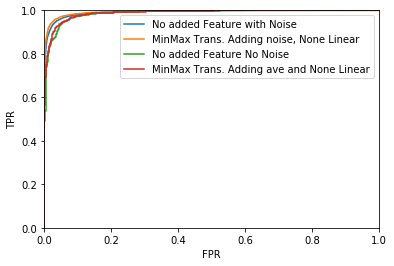

In [20]:
# Alpha=100
fpr2te, tpr2te, thr2te = sklearn.metrics.roc_curve(y_va, y_hat_Origin)
plt.plot(fpr2te,tpr2te, label="No added Feature with Noise")

fpr3te, tpr3te, thr3te = sklearn.metrics.roc_curve(y_va, y_hat_New)
plt.plot(fpr3te,tpr3te, label="MinMax Trans. Adding noise, None Linear")

fpr1Tte, tpr1Tte, thr1Tte = sklearn.metrics.roc_curve(y_va0, y_hat0)
plt.plot(fpr1Tte,tpr1Tte, label="No added Feature No Noise")

fprTte, tprTte, thrTte = sklearn.metrics.roc_curve(y_va0, y_hat1)
plt.plot(fprTte,tprTte, label="MinMax Trans. Adding ave and None Linear")

plt.xlim([-0.0, 1.0]);
plt.ylim([-0.0, 1.0]);
plt.legend();
plt.xlabel("FPR");
plt.ylabel("TPR");

False Positive


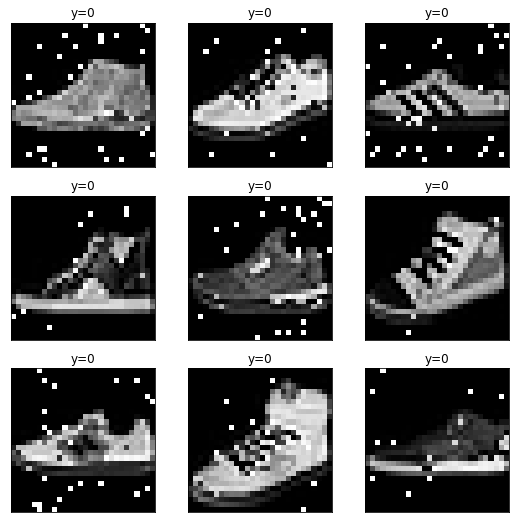

In [31]:
x_FP_9=x_va[FPSample]
y_FP_9=y_va[FPSample]
x_FN_9=x_va[FNSample]
y_FN_9=y_va[FNSample]
print("False Positive")
show_images(x_FP_9, y_FP_9)

False Negative


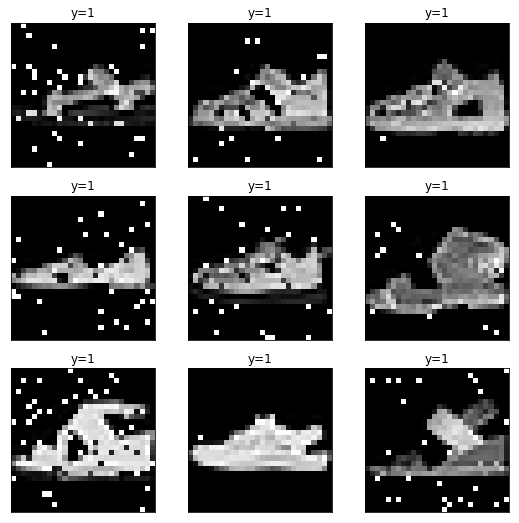

In [32]:
print("False Negative")
show_images(x_FN_9, y_FN_9)

In [21]:
x_test_NF=genfromtxt('data_sneaker_vs_sandal/x_test.csv', delimiter=',')[1:]
yproba1_test_N = new_lr2.predict_proba(x_test_NF)[:, 1]
np.savetxt('yproba1_test.txt', yproba1_test_N)

TurnOn Loaded
TurnOnOnce Loaded
TurnOn All Loaded
TurnOn Rate Loaded
TurnOnOnce Rate Loaded
Ave Loaded


0.455 0.9926

In [34]:
w1=new_lr2.w_G[-7:-1]
print(w1)
print(w1.size)

[-9.57578915e-01  2.07896230e+00 -8.09081608e-01 -3.56350488e-04
  1.71354425e-03 -7.48898383e-03]
6
